# 📉 Análise de Resíduos, Curva de Previsão e Validação Cruzada

## 🎯 Objetivo
Aprofundar a avaliação do modelo com:
- Visualização dos resíduos
- Curva de previsão (y real vs y previsto)
- Validação cruzada com K-Fold

## 📦 Etapa 1: Importações

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## 📂 Etapa 2: Carregar e preparar os dados

In [2]:
df = pd.read_csv("exame_diabes.csv")
df = df.drop(columns=["id_paciente"])
df = pd.get_dummies(df, columns=["genero"], drop_first=True)

# Criar variável IMC

In [3]:
df["altura_m"] = df["altura"] / 100
df["imc"] = df["peso"] / (df["altura_m"] ** 2)
df.drop(columns=["altura_m"], inplace=True)

## ✂️ Etapa 3: Separar dados e dividir treino/teste

In [4]:
X = df.drop(columns=["resultado"])
y = df["resultado"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## 🧠 Etapa 4: Treinar modelo e prever

In [5]:
modelo = LinearRegression().fit(X_train, y_train)
y_pred = modelo.predict(X_test)

## 📊 Etapa 5: Visualização dos resíduos

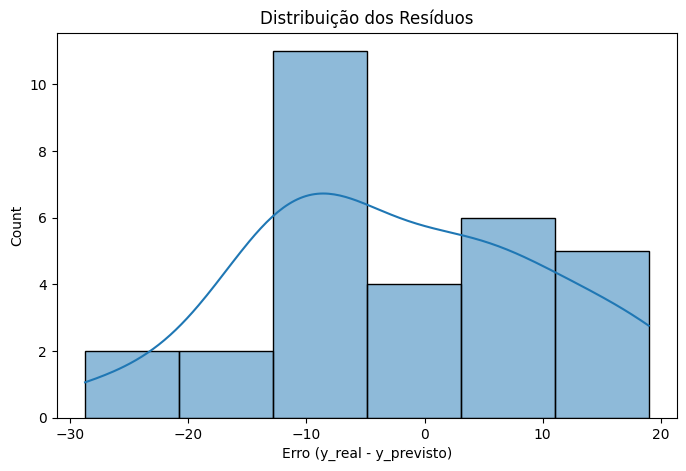

In [7]:
residuos = y_test - y_pred
plt.figure(figsize=(8, 5))
sns.histplot(residuos, kde=True)
plt.title("Distribuição dos Resíduos")
plt.xlabel("Erro (y_real - y_previsto)")
plt.show()


## 📈 Etapa 6: Curva de Previsão

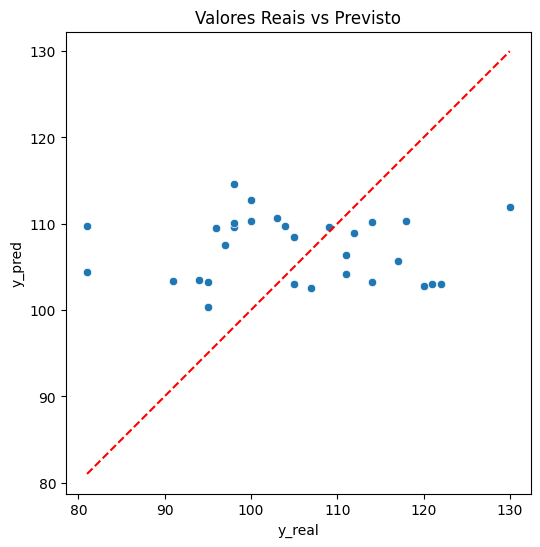

In [8]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("Valores Reais vs Previsto")
plt.xlabel("y_real")
plt.ylabel("y_pred")
plt.axis("equal")
plt.show()

## 🔁 Etapa 7: Validação Cruzada (K-Fold)

In [9]:
modelo_cv = LinearRegression()
cv_scores = cross_val_score(modelo_cv, X, y, cv=5, scoring='r2')
print("R² médio na validação cruzada:", cv_scores.mean())
print("Desvio padrão:", cv_scores.std())

R² médio na validação cruzada: -0.26167677680500395
Desvio padrão: 0.13729591703748656


## 📏 Etapa 8: Avaliação final

In [10]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² :", r2_score(y_test, y_pred))

MAE: 10.658071277528022
MSE: 155.7199908235949
R² : -0.16015589060715918


## ✅ Conclusão

- A distribuição dos resíduos ajuda a verificar viés do modelo
- O gráfico real vs previsto mostra a precisão das previsões
- K-Fold valida a generalização com diferentes divisões dos dados
